--------------------------------------------------------------------------
RODAR PRIMEIRO SEMPRE
--------------------------------------------------------------------------



In [39]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
import seaborn as sns

Kb = 8.6173324 * (10)**(-5)

--------------------------------------------------------------------------
1a parte - Dicionário
--------------------------------------------------------------------------

In [40]:
#------------------CÓDIGO PARA MOSTRAR O DICIONÁRIO-----------------------------

DicionarioComOsValoresDeJ = {
    "Fe": 0.045,
    "Co": 0.060,
    "Ni": 0.027,
    "Fe2O3": 0.041,
    "NiOFe2O3": 0.037,
    "MgOFe2O3": 0.031,
    "Imã de Neodímio": 0.029
}

print("Dicionário - Valores de J: "  + str(DicionarioComOsValoresDeJ))

Dicionário - Valores de J: {'Fe': 0.045, 'Co': 0.06, 'Ni': 0.027, 'Fe2O3': 0.041, 'NiOFe2O3': 0.037, 'MgOFe2O3': 0.031, 'Imã de Neodímio': 0.029}


In [41]:
#------------------CÓDIGO PARA O USUÁRIO ESCOLHER UMA SUBSTÂNCIA----------------



subs = input("Escolha um composto: ")
J = DicionarioComOsValoresDeJ[subs]

print("\nComposto escolhido pelo usuário: " + subs)
print("Valor de J: " + str(J), "eV")





#------------------CALCULAR A TEMPERATURA DE CURIE------------------------------


Tc = J * (2 / Kb)

print("\nTemperatura de Curie: ", Tc, "K")

Escolha um composto: Fe

Composto escolhido pelo usuário: Fe
Valor de J: 0.045 eV

Temperatura de Curie:  1044.4067354300964 K


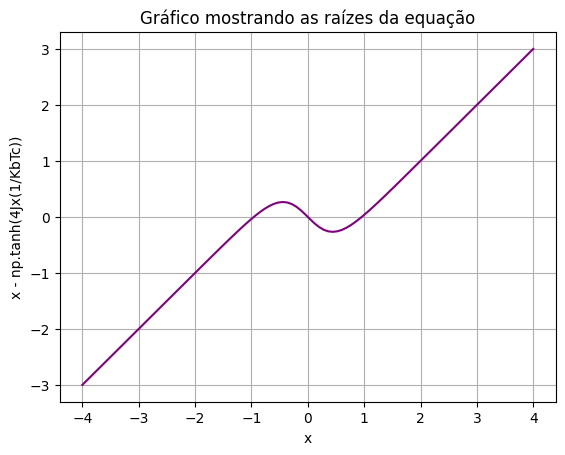

In [42]:
#-------------------GRÁFICO PRA ANALISAR A RAÍZ---------------------------------


x = np.linspace(-4,4,100)
y1 = x - np.tanh(4*(1/(Kb*Tc))*J*x)


fig, ax = plt.subplots()
ax.plot(x, y1, color="purple")

plt.grid()
plt.xlabel("x")
plt.ylabel("x - np.tanh(4Jx(1/KbTc))")

ax.set_title('Gráfico mostrando as raízes da equação')

plt.show()

In [43]:
#CALCULAR TOLERÂNCIA ANTES
e = float(input("tolerância = "))
#10e-7


print("e = ", e)

tolerância = 10e-7
e =  1e-06


In [44]:
#--------------------CALCULANDO A RAÍZ USANDO NEWTON RAPHSON--------------------

print('Método de Newton-Raphson')

x0 = 1.0
h = 0.01

def t(x):
  return x - np.tanh((4*(1/(Kb*Tc))*J*x))


def df(x):
  return (t(x+h)-t(x))/h

i=0
while np.abs(t(x0)) > e:

  x0 = x0-(t(x0)/df(x0))
  i+=1

  print('iteração:', i, 'raiz:', x0)

print("a raiz final encontrada é: ", x0)




#--------------------CALCULANDO A RAÍZ USANDO MÉTODOS DA SECANTES---------------


print('\nMétodo das Secantes:')


a = [1,0.9]
i = 0
while abs(t(a[i])) > e:
  i+=1
  print('iteração: ',i, 'raiz', a[i])
  a.append ((a[i-1]*t(a[i])-a[i]*t(a[i-1]))/(t(a[i])-t(a[i-1])))

print("a raiz final encontrada é: ", a[i])




Método de Newton-Raphson
iteração: 1 raiz: 0.9582390691134642
iteração: 2 raiz: 0.9575069852377777
iteração: 3 raiz: 0.9575040352188507
a raiz final encontrada é:  0.9575040352188507

Método das Secantes:
iteração:  1 raiz 0.9
iteração:  2 raiz 0.9565437291813238
iteração:  3 raiz 0.9575272630609454
iteração:  4 raiz 0.9575040155354095
a raiz final encontrada é:  0.9575040155354095


---------------------------------------------------------------------------
GRÁFICOS
--------------------------------------------------------------------------

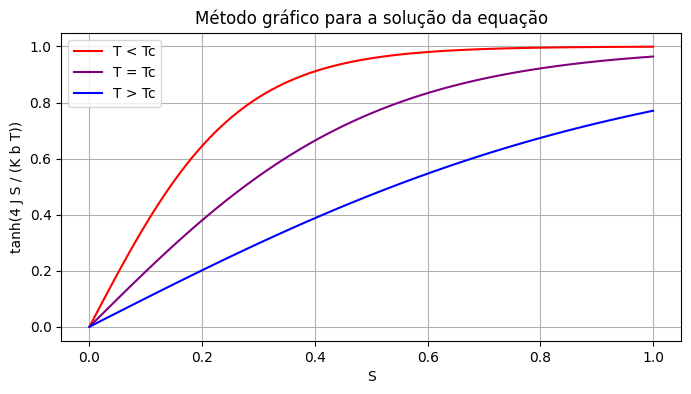

In [45]:

#--------------------MÉTODO GRÁFICO DA EQ. TANH---------------


x = np.linspace(0,1,100)


T1 = Tc - 500
T2 = Tc + 1000

y1 = np.tanh(4*(1/(Kb*Tc))*J*x)
y2 = np.tanh(4*(1/(Kb*T2))*J*x)
y3 = np.tanh((4*(1/(Kb*T1))*J*x))


fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, y3, color="red", label="T < Tc")
ax.plot(x, y1, color="purple", label="T = Tc")
ax.plot(x, y2, color="blue", label="T > Tc")

plt.grid()
plt.xlabel("S")
plt.ylabel("tanh(4 J S / (K b T))")
ax.legend()
ax.set_title('Método gráfico para a solução da equação')

plt.show()

In [52]:


#--------------------CALCULANDO RAÍZES PRA DIFERENTES T---------------
#-------------------PRA PLOTAR A MAGNETIZAÇÃO MÉDIA POR SPIN -------------------


X = list(map(float, input("Valores para T: ").split()))

X = [float(num) for num in X]

x0 = 1.1
h = 0.01

X_lista = []
resultadosS = ([])

for T in X:
  def t(x):
    return x - np.tanh(4*x*(J/(Kb*T)))

  def df(x):
    return (t(x+h)-t(x))/h

  i=0
  while np.abs(t(x0)) > e:

    x0 = x0-(t(x0)/df(x0))
    i+=1


  resultadosS = np.append(resultadosS, x0)
  X_lista.append(x0)



x = ([]) #KbT/J
for T in X:
  x_result = Kb * T / J
  x = np.append(x, x_result)






#-------------------------CALOR ESPECÍFICO--------------------------------------
c = ([])
#LISTA COM VALORES DE x0 (resultado, S)
for i in X_lista:

  C = (16 * (((1/(Kb*T))*J)**2) * (i**2) * ((1 / ((np.cosh(4*(1/(Kb*T))*J* i) - 4 * (1 / (Kb * T))* J)))))
  c = np.append(c, C)



#------------------------ENERGIA MÉDIA--------------------------------------

e = ([])
for i in X_lista:

  E_T = -2 * (i**2)
  e = np.append(e, E_T)



Valores para T: 0.3 250.0 550.0 800.0 1035.0 1100.0 1200.0 1350.0 1480.0 1600.0 1700.0 1880.0 1920.0 2000.0 2010.0 2040.0 2060.0 2080.0 2100.0 2130.0 2150.0 2190.0


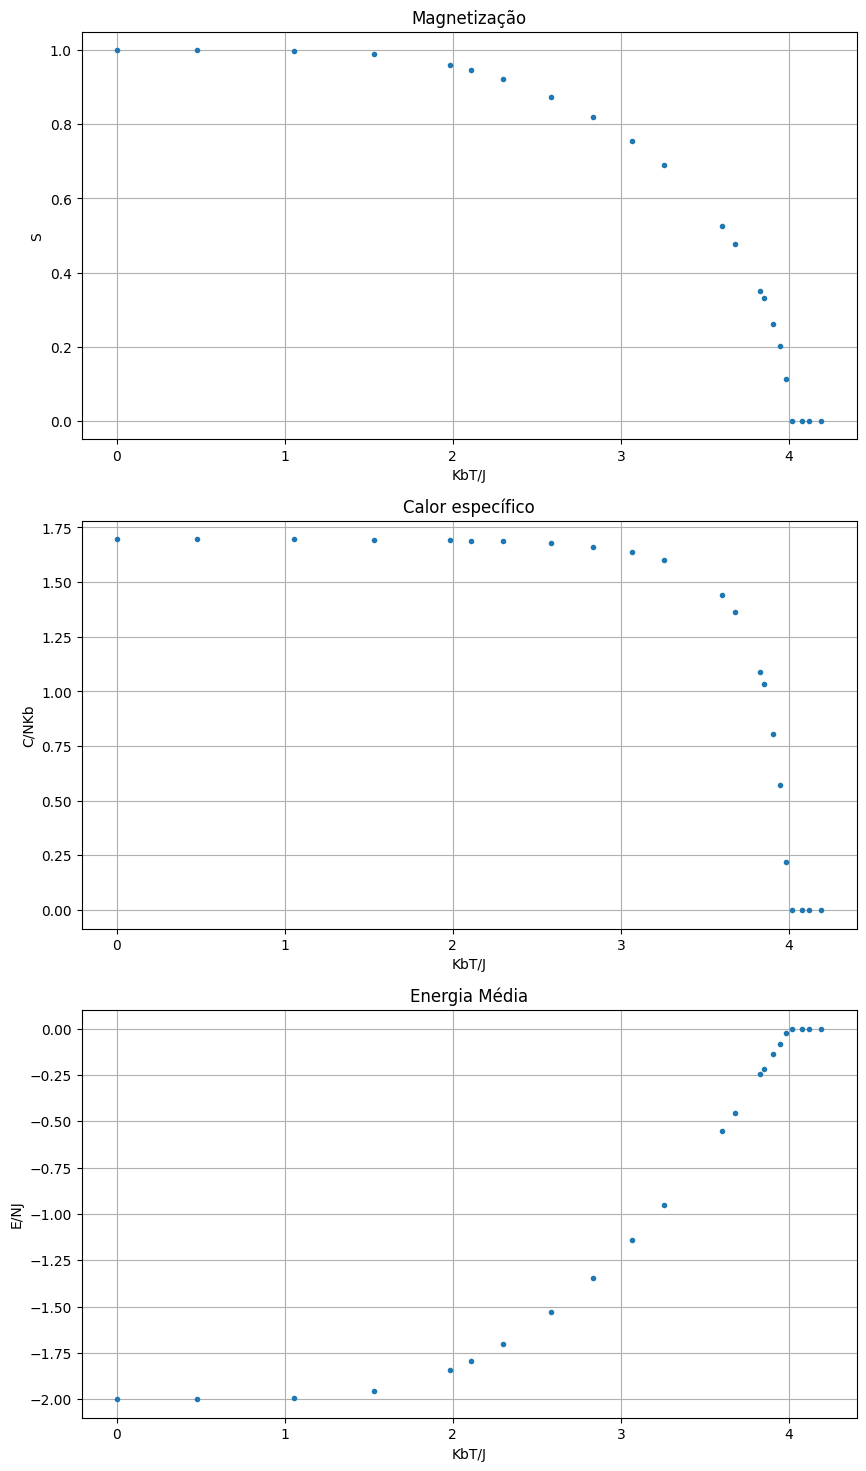

In [51]:
#---------------------GRÁFICOS -------------------------------------------------


y = resultadosS
y1 = c
y2 = e


figure, axis = plt.subplots(3, 1, figsize=(10, 18)) #aumenta o gráfico


axis[0].plot(x, y, ".")
axis[0].set_title("Magnetização")
axis[0].set_ylabel('S')
axis[0].set_xlabel('KbT/J')
axis[0].grid(True)

axis[1].plot(x, y1, ".")
axis[1].set_title("Calor específico")
axis[1].set_ylabel('C/NKb')
axis[1].set_xlabel('KbT/J')
axis[1].grid(True)

axis[2].plot(x, y2, ".")
axis[2].set_title("Energia Média")
axis[2].set_ylabel('E/NJ')
axis[2].set_xlabel('KbT/J')
axis[0].grid(True)

plt.grid()
plt.show()

